# **IDENTIFIKASI VEGETASI OTOMATIS DENGAN GAMBAR GOOGLE EARTH MENGGUNAKAN CONVOLUTIONAL NEURAL NETWORK** 

# Preferensi

Penelitian Sebelumnya :
**Metode Convolutional Neural Network pada Gambar Google Earth Hutan Bambu di Jepang dengan .** 

*Shuntaro Watanabe, Kazuaki Sumi, Takeshi Ise*

link sebagai berikut : https://doi.org/10.1101/351643

**Note**

Penelitian ini mengambil konsep dari peneliti asal Jepang yang mengidentifikasikan vegatasi akurasi tinggi lahan hutan bamboo di beberapa wilayah Jepang, dengan klasisfikasi CNN, dan dilakukan dengan metode chopped-image.

Sedangkan pada penelitian ini memiliki konsep yang serupa dengan penelitian sebelumnya, akan tetapi mengambil sampel yang dilakukan lahan persawahan di Kabupaten Banyumas. 

Peneliti : Fendy Prayogi

Repositori tersedia pada : https://github.com/Gio1709/paddy


# Mengimpor/Mengambil Fungsi Library

In [1]:
!pip install slidingwindow
import slidingwindow as sw
import numpy as np
import os
import keras.backend as K
import keras
from keras.models import Sequential
from keras import layers
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
from sklearn.utils.class_weight import compute_class_weight


Using TensorFlow backend.


# Mengambil Dataset dari Github

In [0]:
# Mengambil dataset dari github
!apt-get install subversion > /dev/null
!svn export https://github.com/Gio1709/paddy/trunk/data > /dev/null 

#!wget https://raw.githubusercontent.com/Gio1709/paddy/master/paddy.zip paddy.zip
#!unzip -P paddy paddy.zip


**Persiapan :**

*Program ini dibuat untuk mengidentifikasi lahan sawah dan luas di Kabupaten Banyumas*

File tersimpan dalam folder :
1. */chopped*
2. */train*
3. */test* 

# Mengimpor Datasheet

In [3]:
#Perintah untuk melihat list bagian dari file yang sudah diunduh dari Github

!ls data/paddy/train
#gambar dengan nama awalan dengan "b" adalah gambar yang terdapat padi"
#gambar dengan nama awalan dengan "o" adalah gambar yang tidak terdapat padi"

b100.jpg  b32.jpg  b55.jpg  b78.jpg  o100.jpg  o32.jpg	o55.jpg  o78.jpg
b10.jpg   b33.jpg  b56.jpg  b79.jpg  o10.jpg   o33.jpg	o56.jpg  o79.jpg
b11.jpg   b34.jpg  b57.jpg  b7.jpg   o11.jpg   o34.jpg	o57.jpg  o7.jpg
b12.jpg   b35.jpg  b58.jpg  b80.jpg  o12.jpg   o35.jpg	o58.jpg  o80.jpg
b13.jpg   b36.jpg  b59.jpg  b81.jpg  o13.jpg   o36.jpg	o59.jpg  o81.jpg
b14.jpg   b37.jpg  b5.jpg   b82.jpg  o14.jpg   o37.jpg	o5.jpg	 o82.jpg
b15.jpg   b38.jpg  b60.jpg  b83.jpg  o15.jpg   o38.jpg	o60.jpg  o83.jpg
b16.jpg   b39.jpg  b61.jpg  b84.jpg  o16.jpg   o39.jpg	o61.jpg  o84.jpg
b17.jpg   b3.jpg   b62.jpg  b85.jpg  o17.jpg   o3.jpg	o62.jpg  o85.jpg
b18.jpg   b40.jpg  b63.jpg  b86.jpg  o18.jpg   o40.jpg	o63.jpg  o86.jpg
b19.jpg   b41.jpg  b64.jpg  b87.jpg  o19.jpg   o41.jpg	o64.jpg  o87.jpg
b1.jpg	  b42.jpg  b65.jpg  b88.jpg  o1.jpg    o42.jpg	o65.jpg  o88.jpg
b20.jpg   b43.jpg  b66.jpg  b89.jpg  o20.jpg   o43.jpg	o66.jpg  o89.jpg
b21.jpg   b44.jpg  b67.jpg  b8.jpg   o21.jpg   o44.jpg	o67.jpg  o8.j

#Menampilkan Gambar Pelatihan

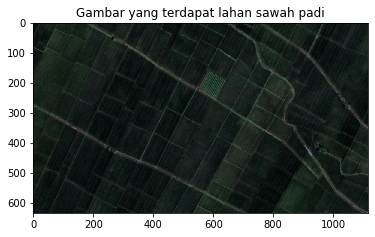

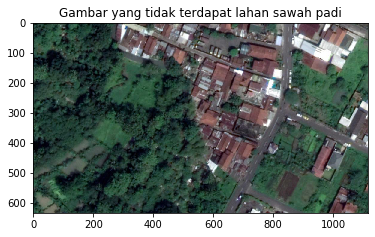

In [4]:
#Gambar yang terdapat lahan sawah padi
plt.title("Gambar yang terdapat lahan sawah padi")
plt.imshow(imread("data/paddy/train/b2.jpg"))
plt.show()

#Gambar yang terdapat tidak lahan sawah padi
plt.title("Gambar yang tidak terdapat lahan sawah padi")
plt.imshow(imread("data/paddy/train/o10.jpg"))
plt.show()


# Membuat "patches" dari setiap gambar menggunakan metode sliding window

**Apa itu *Sliding Window* ?**

*Sliding window* adalah window yang bergeser untuk memprediksi dan mencari area objek yang benar. Suatu proses deteksi objek memerlukan teknik lokalisasi 
untuk menemukan area objek. 



In [5]:
def save_to_folder(img_path,directory,size=224,overlap=0.4):
    #Membaca gambar path penyimpanan window ke direktori/file yang spesifik
    img = imread(img_path)
    basename = os.path.basename(img_path)
    fname = os.path.splitext(basename)[0]
    windows = sw.generate(img, sw.DimOrder.HeightWidthChannel, size, overlap)
    for i,window in enumerate(windows):
        ii = str("{0:05d}".format(i))
        _fname = fname + "_" + ii + ".jpg"
        _img = img[window.indices()]
        if _img.shape !=(size,size,3):
            continue
        img_target_path = os.path.join(directory,_fname)
        
        imsave(img_target_path,_img)

##Mengembalikan daftar gambar train pada direktori
files = os.listdir("data/paddy/train/")
files = [x for x in files if x.endswith(".jpg")]

#Menyimpan gambar yang telah dicacah pada folder chopped
for file in files:
    save_directory = "data/paddy/chopped"
    file = os.path.join("data/paddy/train/",file)
    save_to_folder(file,save_directory)

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: data/paddy/chopped/b79_00012.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: data/paddy/chopped/b79_00016.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: data/paddy/chopped/b79_00020.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: data/paddy/chopped/b79_00021.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: data/paddy/chopped/b79_00025.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: data/paddy/chopped/b79_00030.jpg is a lo

In [6]:
#Mengembalikan daftar gambar yang telah diacak pada direktori
files = os.listdir("data/paddy/chopped/")
files = [x for x in files if x.endswith(".jpg")]

#Memuat dataset Pelatihan
x = []
y = []

for file in files:
    if file.startswith("b"):
        label = 1
    else:
        label = 0
    
    img_path = os.path.join("data/paddy/chopped",file)
    img = load_img(img_path)
    img = img_to_array(img)/255
    x.append(img)
    y.append(label)

x = np.array(x)
y = np.array(y)
print(x.shape,y.shape)

(8000, 224, 224, 3) (8000,)


In [7]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(x,y,test_size=0.1,stratify = y)

print(train_x.shape)
print(train_y.shape)
print(valid_x.shape)
print(valid_y.shape)

(7200, 224, 224, 3)
(7200,)
(800, 224, 224, 3)
(800,)


In [8]:
#Mengkomputasi kelas bobotnya
print(np.unique(train_y,return_counts=True))
print(np.unique(valid_y,return_counts=True))

cw = compute_class_weight("balanced",np.unique(train_y),train_y)
print(cw)

(array([0, 1]), array([3600, 3600]))
(array([0, 1]), array([400, 400]))
[1. 1.]


# Membuat Pemodelan dan Pelatihan Model

Sesudah mengimpor dataset, kita akan menggunakan CNN, salah satu arsitektur Deep Learning yang dapat menghandle gambar. Dengan menggunakan Deep CNN, kita dibebaskan dari pendefinisian fitur yang cocok dan hanya memberikan gambar-gambar ke jaringan. CNN akan menentukan fitur yang paling cocok untuk pengklasifikasian.

#Pembuatan Model

In [0]:
import tensorflow as tf

In [10]:
IMG_SHAPE = (224, 224, 3)
# Membuat model dasar (base model) dari pre-trained model MobileNet
base_model = tf.keras.applications.MobileNet(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
17227776/17225924 [==============================] - 1s 0us/step


In [11]:
base_model.trainable = True
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [0]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras import layers
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split

In [13]:
model = tf.keras.Sequential([
    base_model,    
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile("adam",loss="sparse_categorical_crossentropy",metrics=["acc"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
conv2d (Conv2D)              (None, 5, 5, 32)          294944    
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 99        
Total params: 3,523,907
Trainable params: 3,502,019
Non-trainable params: 21,888
_________________________________________________________________


#Pelatihan


In [14]:
from keras.callbacks import EarlyStopping, ModelCheckpoint 

#Menyimpan model bobot yang terbaik selama training
ckpt = ModelCheckpoint("paddy.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

history = model.fit(train_x,train_y,batch_size=128,epochs=100,validation_data=(valid_x,valid_y),class_weight=cw, callbacks = [ckpt])

Train on 7200 samples, validate on 800 samples
Epoch 1/100
7168/7200 [============================>.] - ETA: 0s - loss: 0.1103 - acc: 0.9674
Epoch 00001: val_loss improved from inf to 11.23279, saving model to paddy.h5
7200/7200 [==============================] - 40s 6ms/sample - loss: 0.1098 - acc: 0.9675 - val_loss: 11.2328 - val_acc: 0.5587
Epoch 2/100
7168/7200 [============================>.] - ETA: 0s - loss: 0.0074 - acc: 0.9976
Epoch 00002: val_loss improved from 11.23279 to 2.41210, saving model to paddy.h5
7200/7200 [==============================] - 33s 5ms/sample - loss: 0.0073 - acc: 0.9976 - val_loss: 2.4121 - val_acc: 0.7775
Epoch 3/100
7168/7200 [============================>.] - ETA: 0s - loss: 0.0091 - acc: 0.9969
Epoch 00003: val_loss improved from 2.41210 to 0.09968, saving model to paddy.h5
7200/7200 [==============================] - 34s 5ms/sample - loss: 0.0091 - acc: 0.9969 - val_loss: 0.0997 - val_acc: 0.9725
Epoch 4/100
7168/7200 [============================

#Menggambarkan Hasil Pelatihan

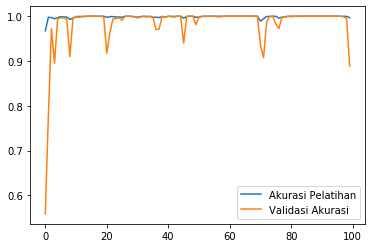

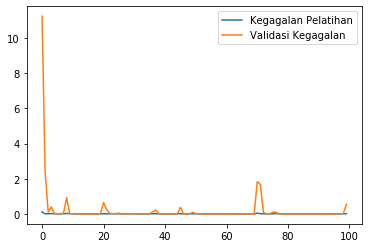

In [15]:
plt.plot(history.history["acc"],label="Akurasi Pelatihan")
plt.plot(history.history["val_acc"],label="Validasi Akurasi")
plt.legend()
plt.show()

plt.plot(history.history["loss"],label="Kegagalan Pelatihan")
plt.plot(history.history["val_loss"],label="Validasi Kegagalan")
plt.legend()
plt.show()

# Evaluasi Gambar Pelatihan dengan Gambar Test data

In [0]:
#Memuat file bobot model keras ".h5" dengan paling sedikit data validasi yang hilang/error

model.load_weights("paddy.h5")

In [17]:
#Memeriksa matriks model
print(model.metrics_names)
#Evaluasi data training
print(model.evaluate(x= train_x, y = train_y))
#Evaluasi validasi data
print(model.evaluate(x= valid_x, y = valid_y))

['loss', 'acc']
7200/7200 [==============================] - 7s 907us/sample - loss: 9.2090e-04 - acc: 0.9997
[0.0009209045288746292, 0.99972224]
800/800 [==============================] - 1s 908us/sample - loss: 3.6078e-06 - acc: 1.0000
[3.607799510616516e-06, 1.0]


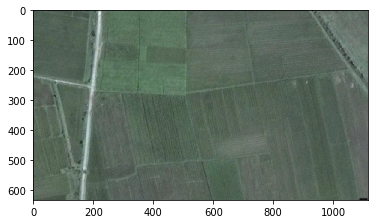

6
66 6 11


In [30]:
#Membaca Gambar Test Data dan Menampilkannya
#img_path = "data/paddy/test/test_image/test_image2.jpg"
#img = load_img(img_path)
#img = img_to_array(img)/255
#plt.imshow(img)
#plt.show()

X_test = []
y_test = []
labels = ['Jawa', 'Kalimantan', 'Sumatra']

for i,label in enumerate(labels):
    folder = os.path.join("/content/data/paddy/test/",label)
    files = sorted(os.listdir(folder))
    files = [x for x in files if x.endswith(".jpg")]
    for k,file in enumerate(files):
        img_path = os.path.join(folder, file)

        img = load_img(img_path)
        img = img_to_array(img)/255

        X_test.append(img)
        category = os.path.split(folder)[-1]
        y_test.append(i)

X_test = np.array(X_test)
y_test = np.array(y_test)

plt.imshow(img)
plt.show()

#Membuat subimages dengan patches menggunkan metode sliding windows
patches = []
windows = sw.generate(img, sw.DimOrder.HeightWidthChannel, 224, 0.6)
for i,window in enumerate(windows):
    _img = img[window.indices()]
    patches.append(_img)
patches = np.array(patches)

#Mengecek total gambar dan banyaknya gambar yang terpasang pada height direction, maupun width direction
n_total = len(windows)
_x = 0
for i,window in enumerate(windows):
    if _x != window.x:
        n_x = i
        print(n_x)
        break
    _x = window.x


print(n_total,n_x,n_total//n_x)

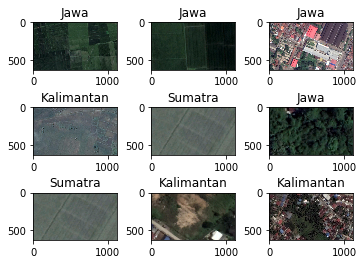

In [31]:
plt.subplots_adjust(wspace=0.2, hspace=0.8)

#Menampilkan beberapa gambar dari dataset pelatihan secara acak
index = np.random.randint(0,X_test.shape[0],size=9)

for i, idx  in enumerate(index):
    plt.subplot(3,3,i+1)
    
    if y_test[idx] == 0:
        label = "Jawa"
    elif y_test[idx] == 1:
        label = "Kalimantan"
    else:
        label = "Sumatra"
    plt.title(label)
    plt.imshow(X_test[idx])


#Prediksi Gambar Individual

In [32]:
#Memprediksi prpbalititas keberadaaan lahan sawah padi terhadap gambar yang telah dicacah 
#dan kembali pada gambar original
predictions = model.predict(patches)
print(predictions.shape)
print(predictions)

paddy = np.reshape(predictions,(n_total//n_x,n_x))
paddy = np.rot90(paddy)
paddy = np.flip(paddy,axis=0)
plt.imshow(paddy,cmap="jet")

(66, 3)
[[9.99118626e-01 8.81323474e-04 1.19130206e-10]
 [4.21149886e-11 1.00000000e+00 3.06140006e-25]
 [2.74175431e-12 1.00000000e+00 4.05141488e-24]
 [1.78948667e-05 9.99982119e-01 3.03156167e-09]
 [2.31551062e-02 9.76704836e-01 1.40074437e-04]
 [4.41481220e-03 9.95582521e-01 2.77583263e-06]
 [5.34404404e-02 9.46559608e-01 5.53509683e-09]
 [2.61868172e-05 9.99973774e-01 5.94474123e-12]
 [1.46361629e-06 9.99998569e-01 3.01916288e-14]
 [6.99902594e-01 3.00077558e-01 1.98362795e-05]
 [9.84886467e-01 1.47728389e-02 3.40729574e-04]
 [6.67645857e-02 9.33214188e-01 2.12852938e-05]
 [9.98932660e-01 9.95049952e-04 7.22751574e-05]
 [4.82928148e-03 9.95170653e-01 4.75275677e-08]
 [1.13394316e-09 1.00000000e+00 1.66960316e-20]
 [4.49559212e-01 5.50428987e-01 1.18281878e-05]
 [1.42799336e-02 9.85720098e-01 7.20828375e-09]
 [2.27429823e-07 9.99999762e-01 7.18307762e-17]
 [2.92738646e-01 7.07257211e-01 4.13336284e-06]
 [4.72474282e-10 1.00000000e+00 1.56174977e-18]
 [6.75693113e-10 1.00000000e+00 

ValueError: ignored

**Catatan** :
Bahwa setiap gambar sesuai dengan 1 piksel dari probabilitasnya, dan ukurannya tidak kompatibel dengan gambar input.
Oleh karena itu peneliti akan menghitung faktor rasio dan mengubah ukurannya

In [0]:
#Array pada gambar diperbesar menggunakan interpolasi spline
h_factor = img.shape[0]//paddy.shape[0]
w_factor = img.shape[1]//paddy.shape[1]
print(h_factor)

from scipy.ndimage import zoom
zoomed = zoom(paddy,(h_factor,w_factor))

print(zoomed.shape)

In [0]:
#Menampilkan hasil gambar level tertentu
plt.imshow(img)
plt.show()

plt.imshow(img)
plt.imshow(zoomed,alpha=0.3,vmax=1.0,vmin=0,cmap="jet")

plt.colorbar(fraction=0.027, pad=0.04,alpha=0)
plt.show()

#Menampilkan Komparasi Antar Wilayah Dengan Histogram

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

data = {'Jawa': (akurasi),
        'Kalimantan': (akurasi),
        'Sumatra': (akurasi),
        }
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

In [0]:
fig, ax = plt.subplots(figsize=(8, 10))

ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 100], xlabel='Tingkat Akurasi (%)', ylabel='Wilayah',
       title='Akurasi')

#Menampilkan Luas Lahan Sawah yang berwarna Merah


In [0]:
plt.imshow(zoomed,alpha=1,vmax=1.0,vmin=0,cmap="jet")

#Menghitung luas Sawah 


In [0]:
#Menampilkan nilai level zoomed dalam range acak
print("Minimal level zoomed :", np.min(zoomed))
print("Maximal level zoomed :", np.max(zoomed))

In [0]:
#Menampilkan nilai level zoomed dalam range 0 sampai 1
normalized = (zoomed-np.min(zoomed))/(np.max(zoomed)-np.min(zoomed))
print("Minimal level ternomalisasi:", np.min(normalized))
print("Maximal level ternomalisasi:", np.max(normalized))

In [0]:
#Menghitung luas lahan sawah dalam piksel
#Tingkatan level warna dari 0 sampai 1 yang mencapai bentuk sawah adalah 0.5 (Nilai diantara 0 dan 1)
luaspiksel=(normalized>0.5).sum()
akurasi=((normalized>0.5).sum()*100/(normalized<1).sum())
print("Luas lahan sawah dalam piksel :", (luaspiksel))
print("akurasi dalam piksel :", (akurasi))

**"Validasi Nilai Piksel ke dalam Meter"**

![image](https://raw.githubusercontent.com/Gio1709/paddy/master/zoomed%20gambar.jpg)

Dapat dilakukan dengan cara :
1.   Menzoom/memperbesar sampel gambar (sampai batas maksimum).
2.   Menghitung jumlah piksel, sebagai contoh pada objek Bus. Diketahui pada umumnya Bus memiliki lebar sebesar 2,5 Meter. [Resolusi Gambar adalah 1116x632 piksel]
3.   Kalkulasi nilai lebar Bus dalam piksel, disini berjumlah 8 piksel. Lalu dilakukan perhitungan sebagai berikut :
    *   Nilai Meter/Piksel(**M/P**) = **M**(meter) / **P**(piksel)
                           = 2,5 meter / 8 piksel
                           = 0,3125 m/p 
                           ~= 0,3 m/p

Maka konversi 1 piksel menjadi meter pada gambar ini sebesar 0,3 

Untuk menghitung luas maka dilakukan dengan 0,3 x 0,3 = 0,09



**Atau dengan pembanding validitas lainnya, yaitu menggunakan software Google Earth**

![image](https://raw.githubusercontent.com/Gio1709/paddy/master/google%20earth.jpg)

Disini diketahui :
*   Jumlah piksel pada garis berwarna kuning adalah 42 piksel
*   Panjang garis berwarna kuning adalah 14,5 meter

Dengan cara yang sama seprti sebelumnya :
 
 dilakukan perhitungan sebagai berikut :

    *   Nilai Meter/Piksel(M/P) = M(meter) / P(piksel)
                           = 14,5 meter / 42 piksel
                           = 0,323 m/p 
                           ~= 0,3 m/p

In [0]:
#Setelah diketahui luas sawah dalam piksel, kemudian menkonversi dalam meter dan hektar
#Untuk menghitung luas maka dilakukan dengan 0,3 x 0,3 = 0,09 
luasmtr = 0.1089*(luaspiksel)
luasha = (luasmtr)/10000
print("Luas lahan sawah dalam meter persegi :", (luasmtr))
print("Luas lahan sawah dalam hektar :", (luasha))